# German Traffic Sign Classification with Nueral Nets

Waymo is currently testing self-driving cars in the streets of California. This has not only gotten a lot of attention in the US but around the world. There is a group of people in Germany who are looking to provide Waymo with some funding so that they can bring self-driving cars to the German public. While companies like Mercedes and BMW are already working on self-driving cars in Germany, this group of people think bringing in Waymo to Germany will spur innovation and competition. 

Before committing to this opportunity, the group of investors want to test Waymo's self driving models. While they are fairly confident that Waymo's cameras and models can identify people and cars correctly in Germany, they are a bit less confident when it comes to traffic signs given that there can be stark differences. Thus the group of investors want to provide Waymo with some German traffic sign image data and see how well their models can classify the signs. 

Waymo is also eager to expand its training outside of the country so they have agreed to take on the first challenge of properly classifying the German traffic sign data provided by the group of German investors. Given that traffic signs can be different around the world, Waymo has opted to build a new traffic sign classification model from start. They plan to build a CNN to help identify the image data.

The image data provided is already in numerical representation so Waymo plans to do some simple image preprocessing before building a neural network. Given that this model is based on image classification there's not a lot of data analyzation or visualization that can possibly be done. They are just going to build a simple function so that they can visually sample some of the images. 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import tensorflow as tf
import keras.backend as K

K.set_image_data_format('channels_last')
%matplotlib inline
%pylab inline
np.random.seed(1)

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Importing Data

In [2]:
allDataInDict=pd.read_pickle("./data0.pickle")
allDataInDict

{'x_test': array([[[[ 58.,  59.,  61., ..., 202., 205., 203.],
          [ 49.,  52.,  55., ..., 204., 206., 204.],
          [ 44.,  49.,  54., ..., 210., 203., 203.],
          ...,
          [ 66.,  99., 103., ...,  79.,  60.,  58.],
          [ 63., 102., 103., ...,  78.,  61.,  49.],
          [ 67.,  95.,  78., ...,  79.,  58.,  58.]],
 
         [[ 51.,  51.,  47., ..., 215., 216., 216.],
          [ 45.,  52.,  51., ..., 216., 218., 217.],
          [ 40.,  47.,  48., ..., 220., 222., 218.],
          ...,
          [ 57.,  82.,  82., ...,  82.,  60.,  59.],
          [ 59.,  87.,  85., ...,  84.,  59.,  49.],
          [ 57.,  91.,  67., ...,  87.,  65.,  53.]],
 
         [[ 42.,  39.,  36., ..., 232., 233., 234.],
          [ 37.,  44.,  43., ..., 234., 236., 236.],
          [ 35.,  41.,  43., ..., 239., 242., 236.],
          ...,
          [ 41.,  74.,  82., ...,  66.,  50.,  52.],
          [ 46.,  78.,  81., ...,  70.,  51.,  47.],
          [ 45.,  83.,  64., ...,  75.

In [3]:
allDataInDict.keys()

dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])

In [4]:
print("Train Data Shape: {}".format(allDataInDict["x_train"].shape))
print("Validation Data Shape: {}".format(allDataInDict["x_validation"].shape))
print("Test Data Shape: {}".format(allDataInDict["x_test"].shape))

Train Data Shape: (86989, 3, 32, 32)
Validation Data Shape: (4410, 3, 32, 32)
Test Data Shape: (12630, 3, 32, 32)


In [5]:
#Data in array for
trainX=np.array(allDataInDict['x_train'],dtype=np.float32)
trainY=np.array(allDataInDict['y_train'],dtype=np.float32)
validationX=np.array(allDataInDict['x_validation'],dtype=np.float32)
validationY=np.array(allDataInDict['y_validation'],dtype=np.float32)
testX=np.array(allDataInDict['x_test'],dtype=np.float32)
testY=np.array(allDataInDict['y_test'],dtype=np.float32)

## Data Class Distributions

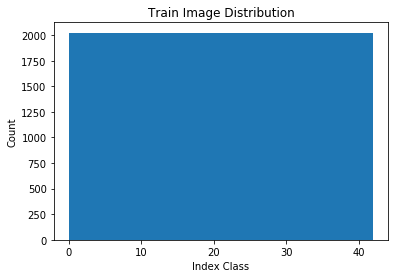

15.0    2023
22.0    2023
35.0    2023
19.0    2023
26.0    2023
34.0    2023
41.0    2023
20.0    2023
12.0    2023
42.0    2023
29.0    2023
10.0    2023
40.0    2023
33.0    2023
25.0    2023
32.0    2023
16.0    2023
2.0     2023
0.0     2023
8.0     2023
14.0    2023
30.0    2023
21.0    2023
31.0    2023
7.0     2023
39.0    2023
38.0    2023
13.0    2023
17.0    2023
3.0     2023
6.0     2023
27.0    2023
11.0    2023
23.0    2023
36.0    2023
5.0     2023
37.0    2023
9.0     2023
1.0     2023
24.0    2023
4.0     2023
18.0    2023
28.0    2023
Name: 0, dtype: int64

In [6]:
dfTrain=pd.DataFrame(trainY)[0]
plt.hist(dfTrain,bins=43);
plt.xlabel("Index Class")
plt.ylabel("Count")
plt.title("Train Image Distribution")
plt.show()
dfTrain.value_counts()

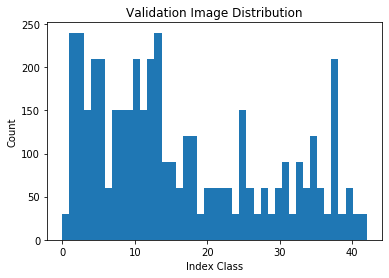

13.0    240
2.0     240
1.0     240
4.0     210
10.0    210
5.0     210
12.0    210
38.0    210
11.0    150
7.0     150
8.0     150
9.0     150
3.0     150
25.0    150
35.0    120
18.0    120
17.0    120
15.0     90
14.0     90
33.0     90
31.0     90
28.0     60
23.0     60
26.0     60
6.0      60
36.0     60
22.0     60
40.0     60
34.0     60
21.0     60
16.0     60
30.0     60
20.0     60
32.0     30
29.0     30
27.0     30
42.0     30
39.0     30
19.0     30
37.0     30
24.0     30
0.0      30
41.0     30
Name: 0, dtype: int64

In [7]:
dfValidation=pd.DataFrame(validationY)[0]
plt.hist(dfValidation,bins=43);
plt.xlabel("Index Class")
plt.ylabel("Count")
plt.title("Validation Image Distribution")
plt.show()
dfValidation.value_counts()

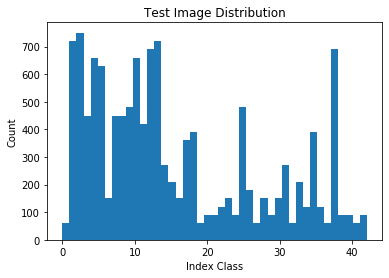

2.0     750
1.0     720
13.0    720
38.0    690
12.0    690
4.0     660
10.0    660
5.0     630
25.0    480
9.0     480
8.0     450
7.0     450
3.0     450
11.0    420
35.0    390
18.0    390
17.0    360
14.0    270
31.0    270
33.0    210
15.0    210
26.0    180
23.0    150
16.0    150
6.0     150
30.0    150
28.0    150
34.0    120
22.0    120
36.0    120
42.0     90
39.0     90
21.0     90
20.0     90
24.0     90
40.0     90
29.0     90
32.0     60
0.0      60
37.0     60
41.0     60
27.0     60
19.0     60
Name: 0, dtype: int64

In [8]:
dfTest=pd.DataFrame(testY)[0]
plt.hist(dfTest,bins=43);
plt.xlabel("Index Class")
plt.ylabel("Count")
plt.title("Test Image Distribution")
plt.show()
dfTest.value_counts()

The good news is that my training data has an equal balance of all 43 types of traffic signs. This means that my model should have good training experience on all types of signs. Thus the model should be good at classifying all signs instead of being biased to the signs that it experienced the most. The things to be cautious about are that both my validation and test datasets have different distributions compared to the distribution of the training data set. Usually one desires the distributions to be the same across all the datasets. In this case perhaps the true distribution of signs that will be experienced in the real-world will be closer to the distribution of the validation/test data sets. If this is the case, then this is an allowable caution as the model will be better equipped for the real world. 


## Viewing some sample images

In [9]:
def showImage(imageArray):
    array = np.zeros([32, 32, 3], dtype=np.uint8)
    array[:,:,0]=imageArray[0]
    array[:,:,1]=imageArray[1]
    array[:,:,2]=imageArray[2]
    img = Image.fromarray(array, 'RGB')
    img.save('my.png')
    #img.show()
    img=mpimg.imread('my.png')
    imgplot = plt.imshow(img)
    plt.show()
    

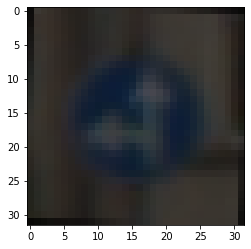

In [10]:
showImage(allDataInDict['x_train'][0])

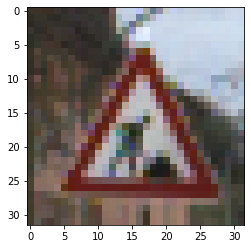

In [11]:
showImage(allDataInDict['x_test'][0])

## Pixel Scaling and Normalization

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1. This can be achieved by dividing all pixels values by the largest pixel value; that is 255.

A popular data preparation technique for image data is to subtract the mean value from the pixel values. This approach is called centering, as the distribution of the pixel values is centered on the value of zero. Centering after normalization will mean that the pixels will have positive and negative values.

The distribution of pixel values often follows a Normal or Gaussian distribution, e.g. bell shape. This distribution may be present per image, per mini-batch of images, or across the training dataset and globally or per channel. As such, there may be benefit in transforming the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. The result is a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.

https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258

In [12]:
#Pixel normalization
trainScaledX = trainX/255
validationScaledX = validationX/255
testScaledX = testX/255

In [13]:
trainMean=np.mean(trainScaledX)
trainSTD=np.std(trainScaledX)

In [14]:
trainNormX=(trainScaledX-trainMean)/trainSTD
validationNormX=(validationScaledX-trainMean)/trainSTD
testNormX=(testScaledX-trainMean)/trainSTD

In [15]:
print("New mean on train data: {}".format(np.mean(trainNormX)))
print("New std on train data: {}".format(np.std(trainNormX)))

New mean on train data: -2.7983685413346393e-06
New std on train data: 1.0000014305114746


The images have now gone through standard pixel scaling and normalization and should now be ready to use in a neaural network.

An alternative approach is to scale the images using a preferred scaling technique just-in-time during the training or model evaluation process. Keras supports this type of data preparation for image data via the ImageDataGenerator class and API. While I continue this project, I will look to implement this instead of manually normalizing the images as this Keras class may be more computationally effective.

## Data Reshaping for Keras

In [16]:
# Reshape the training and test examples 
trainX2 = np.moveaxis(trainNormX,[0,1,2,3],[0,3,1,2])
validationX2 = np.moveaxis(validationNormX,[0,1,2,3],[0,3,1,2])
testX2 = np.moveaxis(testNormX,[0,1,2,3],[0,3,1,2])


In [17]:
trainX2.shape

(86989, 32, 32, 3)

In [18]:
#Function to re-shape target data to put through Keras layers
def oneHot(labels,C):
    One_hot_matrix = tf.one_hot(labels,C)
    return tf.keras.backend.eval(One_hot_matrix)
trainY = oneHot(trainY, 43)
validationY = oneHot(validationY, 43)
testY = oneHot(testY, 43)


## CNN Implementation

Given that the goal is to classify images properly, I will look to use a convolutional neural network (CNN) as this has been a proven model for image classification. Rather than looking at an entire image at once to find certain features it can be more effective to look at smaller portions of the image. A convolution is essentially sliding a filter over the input. Each convolutional layer contains a series of filters known as convolutional kernels. The filter is a matrix of integers that are used on a subset of the input pixel values, the same size as the kernel. Each pixel is multiplied by the corresponding value in the kernel, then the result is summed up for a single value for simplicity representing a grid cell, like a pixel, in the output channel/feature map.

<img src="ConvPic.png"> 

Similarly CNNs often use max-pooling layers. Neighboring pixels in images tend to have similar values, so convolutional layers will typically also produce similar values for neighboring pixels in outputs. As a result, much of the information contained in a convolution layer’s output is redundant. For example, if we use an edge-detecting filter and find a strong edge at a certain location, chances are that we will also find relatively strong edges at locations 1 pixel shifted from the original one. However, these are all the same edge thus we are not finding anything new. Pooling layers solve this problem. All they do is reduce the size of the input it is given by pooling values together in the input. The pooling is usually done by a simple operation like max, min, or average. A max-pool example is below.

<img src="MaxPoolPic.png"> 

In an initial iteration of the model, there was a lot of overfit on the training data. To counteract this I’ve implemented drop-out layers. Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer. Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs. This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust

<img src="DropoutPic.png"> 




In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(padding = 'same',strides=2),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Conv2D(128, 5, activation='relu',padding="same"),
    tf.keras.layers.MaxPool2D(padding = 'same',strides=2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
result = model.fit(x=trainX2,y=trainY,batch_size=256,epochs=10,verbose=1,shuffle=False,initial_epoch=0,validation_data=(validationX2,validationY))

Train on 86989 samples, validate on 4410 samples
Epoch 1/10
86989/86989 [==============================] - 1580s 18ms/sample - loss: 0.6008 - acc: 0.8363 - val_loss: 0.2490 - val_acc: 0.9363
Epoch 2/10
86989/86989 [==============================] - 9313s 107ms/sample - loss: 0.0389 - acc: 0.9897 - val_loss: 0.2370 - val_acc: 0.9438
Epoch 3/10
86989/86989 [==============================] - 1119s 13ms/sample - loss: 0.0251 - acc: 0.9929 - val_loss: 0.2913 - val_acc: 0.9619
Epoch 4/10
86989/86989 [==============================] - 1139s 13ms/sample - loss: 0.0184 - acc: 0.9950 - val_loss: 0.2369 - val_acc: 0.9633
Epoch 5/10
86989/86989 [==============================] - 1130s 13ms/sample - loss: 0.0145 - acc: 0.9958 - val_loss: 0.1956 - val_acc: 0.9651
Epoch 6/10
86989/86989 [==============================] - 1139s 13ms/sample - loss: 0.0126 - acc: 0.9961 - val_loss: 0.3461 - val_acc: 0.9637
Epoch 7/10
86989/86989 [==============================] - 1135s 13ms/sample - loss: 0.0146 - acc: 

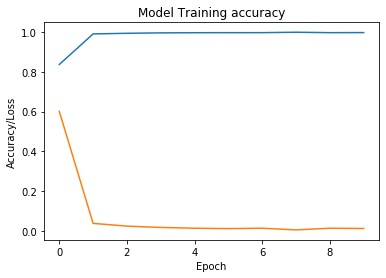

In [70]:
plt.plot(result.history['acc'])
plt.plot(result.history['loss'])
plt.title('Model Training accuracy')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()


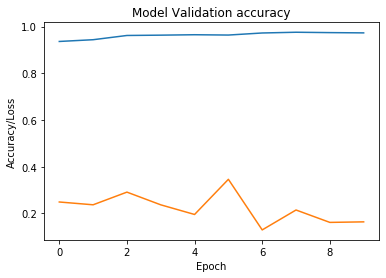

In [71]:
plt.plot(result.history['val_acc'])
plt.plot(result.history['val_loss'])
plt.title('Model Validation accuracy')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()


In [22]:
valid = model.evaluate(validationX2,validationY,verbose=2)

4410/4410 - 29s - loss: 0.1639 - acc: 0.9730


In [23]:
test = model.evaluate(testX2,testY,verbose=2)

12630/12630 - 86s - loss: 0.2651 - acc: 0.9577


So the model is doing very well on the training data with over 99% accuracy. This is not very surprising given the good quality of training data I am working with. The validation and test accuracies are hovering over 97% and 96% accuracy, respectively. Compared to a previous iteration of my CNN, I have significantly decreased the overfitting which makes the model better for real world implementation. 


## Further Analysis

In [24]:
testClasses=model.predict(testX2)
testClasses

array([[3.3293010e-23, 5.9947598e-23, 1.0036170e-19, ..., 1.9261073e-25,
        1.3078284e-22, 2.5272335e-20],
       [1.1947665e-09, 3.1095119e-08, 1.5161229e-08, ..., 1.3484760e-07,
        2.1579469e-11, 4.4495971e-10],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4300139e-18, 8.3594856e-18, 3.6451831e-18, ..., 9.7395399e-12,
        6.1159972e-19, 1.1211598e-18],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4371694e-21, 5.5052626e-21, 6.4718657e-18, ..., 7.3015205e-23,
        6.0099601e-24, 8.9106364e-20]], dtype=float32)

In [26]:
predictedLabels=np.argmax(testClasses,axis=1)

In [27]:
trueLabels=np.argmax(testY,axis=1)

In [28]:
differences=trueLabels-predictedLabels

In [29]:
incorrectPredictions=[(index,trueLabels[index],predictedLabels[index]) for index,a in enumerate(differences) if a!=0]

In [30]:
incorrectPredictions2=[(trueLabels[index],predictedLabels[index]) for index,a in enumerate(differences) if a!=0]

In [31]:
from collections import Counter

In [32]:
#The most common type of mislabeled pairs (True Label,Predicted Label)
Counter(incorrectPredictions2).most_common()

[((5, 2), 33),
 ((21, 31), 27),
 ((18, 31), 17),
 ((25, 11), 16),
 ((6, 38), 16),
 ((18, 25), 16),
 ((4, 7), 14),
 ((30, 29), 13),
 ((9, 10), 12),
 ((27, 11), 11),
 ((8, 5), 11),
 ((18, 26), 10),
 ((6, 5), 9),
 ((18, 27), 9),
 ((26, 25), 9),
 ((18, 11), 9),
 ((11, 25), 8),
 ((27, 23), 8),
 ((3, 5), 8),
 ((12, 40), 7),
 ((30, 23), 7),
 ((30, 20), 7),
 ((30, 25), 7),
 ((35, 34), 6),
 ((30, 31), 6),
 ((12, 11), 6),
 ((18, 22), 6),
 ((28, 30), 6),
 ((20, 25), 5),
 ((1, 2), 5),
 ((7, 5), 5),
 ((12, 15), 5),
 ((28, 23), 5),
 ((20, 23), 5),
 ((26, 29), 5),
 ((25, 39), 5),
 ((41, 12), 5),
 ((40, 7), 5),
 ((5, 7), 5),
 ((21, 1), 4),
 ((2, 1), 4),
 ((11, 30), 4),
 ((30, 39), 4),
 ((10, 31), 4),
 ((27, 25), 4),
 ((42, 12), 4),
 ((4, 5), 4),
 ((9, 3), 3),
 ((8, 7), 3),
 ((23, 19), 3),
 ((8, 31), 3),
 ((31, 20), 3),
 ((5, 20), 3),
 ((2, 3), 3),
 ((25, 27), 3),
 ((11, 23), 3),
 ((7, 8), 3),
 ((4, 1), 3),
 ((5, 3), 2),
 ((32, 1), 2),
 ((8, 39), 2),
 ((1, 25), 2),
 ((24, 30), 2),
 ((40, 5), 2),
 ((26,

In [33]:
#All Incorrect predictions and their index (Index,True Label, Predicted label)
incorrectPredictions

[(41, 5, 3),
 (70, 21, 31),
 (71, 11, 25),
 (110, 11, 27),
 (112, 35, 34),
 (169, 20, 25),
 (241, 32, 1),
 (289, 25, 11),
 (298, 8, 39),
 (301, 18, 26),
 (310, 6, 38),
 (357, 1, 2),
 (376, 7, 5),
 (422, 30, 31),
 (453, 18, 31),
 (461, 6, 5),
 (474, 30, 29),
 (502, 27, 23),
 (511, 4, 7),
 (595, 21, 31),
 (655, 12, 11),
 (690, 25, 11),
 (727, 4, 7),
 (733, 18, 25),
 (742, 12, 15),
 (745, 30, 34),
 (746, 18, 31),
 (781, 21, 1),
 (786, 6, 5),
 (821, 1, 25),
 (822, 9, 10),
 (833, 18, 27),
 (932, 26, 25),
 (961, 9, 3),
 (973, 12, 11),
 (975, 8, 7),
 (1000, 35, 34),
 (1029, 6, 38),
 (1035, 2, 1),
 (1041, 35, 34),
 (1113, 28, 23),
 (1114, 18, 31),
 (1122, 18, 22),
 (1125, 10, 29),
 (1138, 25, 11),
 (1177, 18, 25),
 (1184, 30, 31),
 (1216, 25, 11),
 (1219, 13, 5),
 (1241, 20, 23),
 (1243, 27, 11),
 (1272, 8, 5),
 (1315, 6, 20),
 (1320, 18, 25),
 (1383, 21, 31),
 (1398, 5, 2),
 (1424, 1, 2),
 (1463, 18, 31),
 (1481, 26, 29),
 (1505, 28, 30),
 (1515, 27, 23),
 (1521, 26, 25),
 (1528, 23, 19),
 (1

Trying to find an understanding of the 3 most incorrect label pair predictions and see if there's anything obviously off

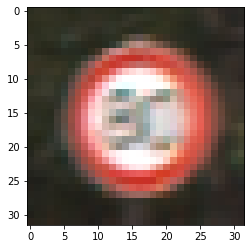

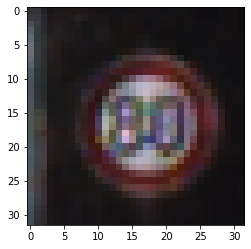

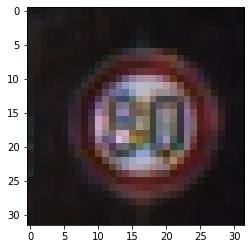

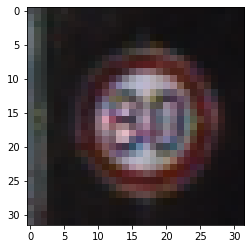

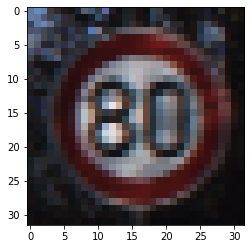

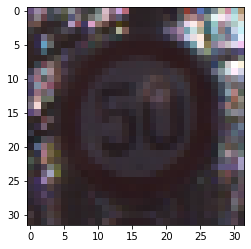

In [45]:
#Predicted 2 labels but truely 5 label Speed limit 80km/h
showImage(allDataInDict['x_test'][1398])
showImage(allDataInDict['x_test'][2146])
showImage(allDataInDict['x_test'][2776])
showImage(allDataInDict['x_test'][2897])
showImage(allDataInDict['x_test'][3567])
#True 2 label 50km/h
showImage(allDataInDict['x_test'][2558])

The true label is 80KM/H sign but the model kept predicting 50KM/H.
1. Both signs have the exact same shape and abstract design.
2. I can understand how the model can possibly confuse an 8 for a 5 and thus why it uses this prediction

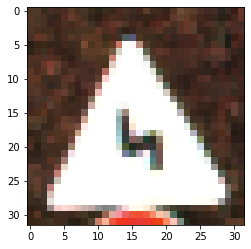

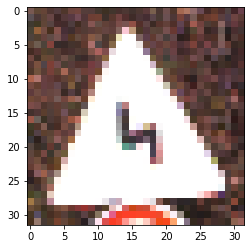

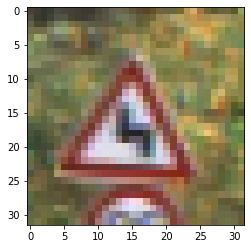

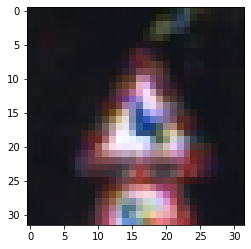

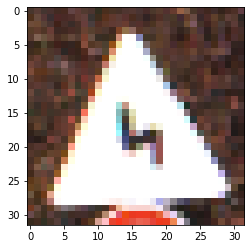

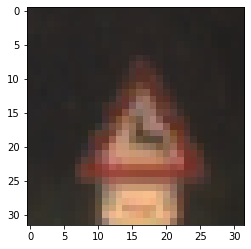

In [72]:
#Predicted 31 labels but truely 21 label Double curve
showImage(allDataInDict['x_test'][70])
showImage(allDataInDict['x_test'][595])
showImage(allDataInDict['x_test'][1383])
showImage(allDataInDict['x_test'][2747])
showImage(allDataInDict['x_test'][2910])
#True 31 label Wild animals crossing
showImage(allDataInDict['x_test'][9543])

The true label is Double Curve sign but the model kept predicting Animal Crossing
1. Both signs have the exact same shape
2. It looks like there's 2 types of Double curve sign. One that is all white and one that is white and red.
3. I can see how the model is confused given there seem to be 2 types of double curve signs and that the shapes of the signs are similar.

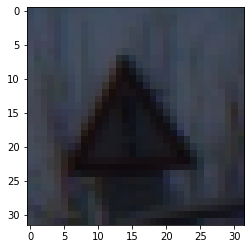

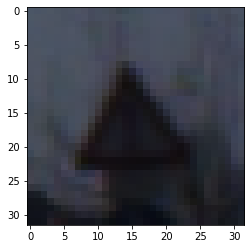

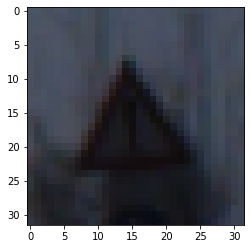

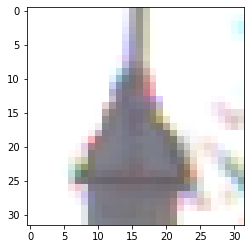

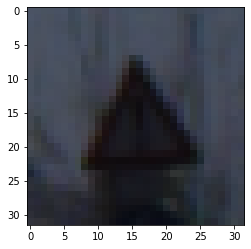

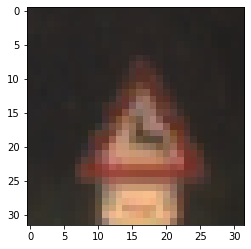

In [74]:
#Predicted 31 labels but truely 18 label General caution
showImage(allDataInDict['x_test'][453])
showImage(allDataInDict['x_test'][746])
showImage(allDataInDict['x_test'][1114])
showImage(allDataInDict['x_test'][1463])
showImage(allDataInDict['x_test'][1982])
#True 31 label Wild animals crossing
showImage(allDataInDict['x_test'][9543])

The true label is a General caution sign but the model kept predicting Animal Crossing
1. Both signs have the exact same shape and abstract design.
2. Some of the general caution signs are hard for even me to discern so I can see how the model may have trouble correctly classifying them. 
3. I can see how the model is confused given there seem to be 2 types of double curve signs and that the shapes of the signs are similar.

In [75]:
#Below checks to see the type of class that was mis-classified the most
df1=pd.DataFrame([trueLabels[index] for index,a in enumerate(differences) if a!=0])
df1[0].value_counts()

18    70
30    48
5     47
21    34
4     27
6     26
27    26
25    25
8     24
12    18
26    18
11    16
9     15
20    15
28    14
7     11
3     11
1     11
2     10
24    10
40     9
35     7
10     7
41     6
42     4
13     4
22     4
23     4
31     3
32     2
0      2
14     1
17     1
33     1
34     1
38     1
39     1
Name: 0, dtype: int64

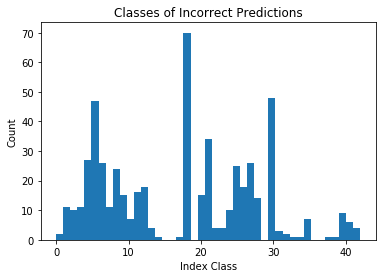

In [76]:
plt.hist([trueLabels[index] for index,a in enumerate(differences) if a!=0],bins=43)
plt.xlabel("Index Class")
plt.ylabel("Count")
plt.title("Classes of Incorrect Predictions")
plt.show()

In [82]:
#The below gives the percentages of False predictions by class
(df1[0].value_counts()/dfTest.value_counts()).sort_values(ascending=False)*100

27.0    43.333333
21.0    37.777778
30.0    32.000000
18.0    17.948718
6.0     17.333333
20.0    16.666667
24.0    11.111111
40.0    10.000000
41.0    10.000000
26.0    10.000000
28.0     9.333333
5.0      7.460317
8.0      5.333333
25.0     5.208333
42.0     4.444444
4.0      4.090909
11.0     3.809524
0.0      3.333333
22.0     3.333333
32.0     3.333333
9.0      3.125000
23.0     2.666667
12.0     2.608696
7.0      2.444444
3.0      2.444444
35.0     1.794872
1.0      1.527778
2.0      1.333333
39.0     1.111111
31.0     1.111111
10.0     1.060606
34.0     0.833333
13.0     0.555556
33.0     0.476190
14.0     0.370370
17.0     0.277778
38.0     0.144928
15.0          NaN
16.0          NaN
19.0          NaN
29.0          NaN
36.0          NaN
37.0          NaN
Name: 0, dtype: float64

Relatively, the model is doing really badly at identifying Pedestrian, Double Curve and Beware of ice/snow signs.

Overall the model passes the initial target of 95% accuracy across all 3 datasets but there does seem to be room for improvement in the incorrect classes previously mentioned. The next steps could be to see if PCA or image whitening preprocessing can help with improvement, especially on the badly mislabeled classes.